In [ ]:
#!pip install keras-rectified-adam
#import keras_radam
#from keras.optimizers import Adam
#from keras_radam import RAdam
#optimizer = RAdam(total_steps=5000, warmup_proportion=0.1, min_lr=1e-5)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip /content/gdrive/MyDrive/MultiClass_CNP.zip> /dev/null

replace __MACOSX/._MultiClass_CNP? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
A
A
A
A
A


In [ ]:
import os
import glob
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
#from keras.layers import merge, Input
from keras.applications.resnet import ResNet101
from keras.applications.resnet import preprocess_input
import fnmatch
import pandas as pd

In [ ]:
from keras.layers import Input
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import keras
import keras.utils
from keras import utils as np_utils
#tf.keras.utils.load_img
image_input = Input(shape=(224,224,3))

model = ResNet101(weights='imagenet', pooling=max, include_top = False)
ResNet101_feature_list=[]
#model.summary()
for root, dirs, files in os.walk("/content/MultiClass_CNP", topdown=False):
   for name in files:
     if name.endswith(('.jpg', '.jpeg', '.gif', '.png')):
        img_path=os.path.join(root, name)
        #img = image.load_img(img_path, target_size=(224, 224))
        img = keras.utils.load_img(img_path, target_size=(224, 224))
        img_data = keras.utils.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)

        ResNet101_feature = model.predict(img_data)
        features_reduce = ResNet101_feature.squeeze()
        ResNet101_feature_np = np.array(features_reduce)
        j=img_path
        pattern = 'Covid'
        if fnmatch.filter((j[i:i+len(pattern)] for i in range(len(j) - len(pattern))), pattern):
          b=np.insert(ResNet101_feature_np.flatten(), 100352, 1)
        pattern = 'Normal'
        if fnmatch.filter((j[i:i+len(pattern)] for i in range(len(j) - len(pattern))), pattern):
          b=np.insert(ResNet101_feature_np.flatten(), 100352, 2)
        pattern = 'Pneumonia'
        if fnmatch.filter((j[i:i+len(pattern)] for i in range(len(j) - len(pattern))), pattern):
          b=np.insert(ResNet101_feature_np.flatten(), 100352, 3)
        ResNet101_feature_list.append(b)
        ResNet101_feature_np.shape

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 404ms/step


In [ ]:
ResNet101_feature_list_np = np.array(ResNet101_feature_list)
ResNet101_feature_list_np.shape

(6913, 100353)

In [ ]:
#from numpy import savetxt
#savetxt('data.csv', ResNet101_feature_list_np, delimiter=',')

In [ ]:
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import label_binarize
 import matplotlib.pyplot as plt

In [ ]:
row, col = ResNet101_feature_list_np.shape
x=ResNet101_feature_list_np[:,0:col-1]
y=ResNet101_feature_list_np[:,col-1]
y = label_binarize(y, classes=[1, 2, 3])
#from sklearn.preprocessing import MultiLabelBinarizer

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.3)
n_classes = y.shape[1]

In [ ]:
##from sklearn import svm, datasets
#from sklearn.neighbors import KNeighborsClassifier

#classifier = KNeighborsClassifier(n_neighbors=3)
#classifier.fit(x_train, y_train)
#y_score = classifier.predict(x_test)

##SVM
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

y_score = OneVsRestClassifier(LinearSVC(random_state=0)).fit(x_train, y_train).predict(x_test)
classifier = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = classifier.fit(x_train, y_train).predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['COVID', 'Normal', 'Pneumonia']
print(classification_report(y_test.argmax(axis=1), y_score.argmax(axis=1), target_names=target_names))

NameError: ignored

In [ ]:
 from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

NameError: ignored

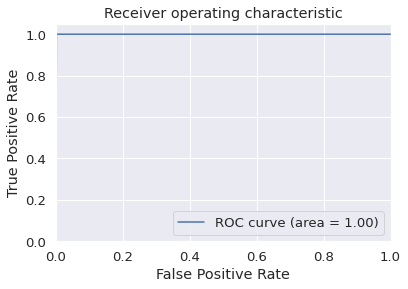

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
#plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


<ipython-input-31-b537c06f9944>:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-31-b537c06f9944>:38: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  plt.plot(fpr[i], tpr[i], color=color, lw=lw,linestyle='--',linewidth=2,
<ipython-input-31-b537c06f9944>:38: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  plt.plot(fpr[i], tpr[i], color=color, lw=lw,linestyle='--',linewidth=2,
<ipython-input-31-b537c06f9944>:38: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passi

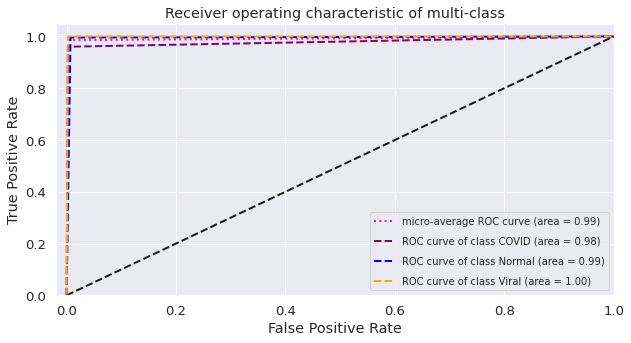

In [ ]:

from itertools import cycle
from scipy import interp
# First aggregate all false positive rates
#target= ['meningioma', 'glioma','pituitary']
#n_classes=enumerate(target)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
figure = plt.figure(figsize = (10,5));
#plt.figure()
#plt.plot(fpr["micro"], tpr["micro"],
 #        label='micro-average ROC curve (area = {0:0.2f})'
  #             ''.format(roc_auc["micro"]))
lw=2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=2)

#for i in range(n_classes):
 #   plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
  #                                 ''.format(target_names[i], roc_auc[i]))

colors = cycle(['purple', 'blue', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,linestyle='--',linewidth=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(target_names[i], roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of multi-class')
plt.legend(loc="best",frameon=True, labelspacing=1,prop={'size': 10})
plt.show()

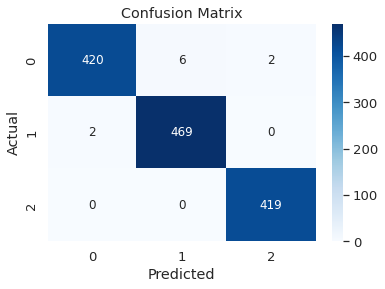

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt1
data = confusion_matrix(y_test.argmax(axis=1), y_score.argmax(axis=1))
df_cm = pd.DataFrame(data, columns=np.unique(y_test.argmax(axis=1)), index = np.unique(y_score.argmax(axis=1)))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
#plt1.figure(figsize = (10,7))
plt1.figure()
plt1.title("Confusion Matrix")
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, fmt="d",cmap="Blues", annot=True,annot_kws={"size": 12});


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(y_test, y_score)
TP = mcm[:, 1, 1]
TN = mcm[:, 0, 0]
FN = mcm[:, 1, 0]
FP = mcm[:, 0, 1]


print("class 0 \t ","class 1 \t ","class 2 \t ")
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("senc",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP)
print("spec",TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("ppv",PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print("NPV",NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print("FPR",FPR)
# False negative rate
FNR = FN/(TP+FN)
print("FNR",FNR)
# False discovery rate
FDR = FP/(TP+FP)
print("FDR",FDR)
# Accuracy
Acc= (TP+TN)/(TP+FP+TN+FN)
print("Accuracy",Acc)

class 0 	  class 1 	  class 2 	 
senc [0.96028037 0.99575372 1.        ]
spec [0.99775281 0.99291617 0.99777531]
ppv [0.99515738 0.98736842 0.99524941]
NPV [0.98121547 0.99762752 1.        ]
FPR [0.00224719 0.00708383 0.00222469]
FNR [0.03971963 0.00424628 0.        ]
FDR [0.00484262 0.01263158 0.00475059]
Accuracy [0.98558422 0.9939302  0.99848255]
